In [1]:
'''
 File name: data_exploration_undesa_2020.ipynb
 Author: Lola Bardel
 Date created: 09/03/2024
 Date last modified: 14/03/2024
 Python Version: 3.6
'''

'\n File name: data_exploration_undesa_2020.ipynb\n Author: Lola Bardel\n Date created: 09/03/2024\n Date last modified: 14/03/2024\n Python Version: 3.6\n'

## Choses à faire

* Automatiser l'importation des documents csv/excel et des feuilles contenues + noms des dataframes 
* Ajouter via l'annexe et les location code une colonne "Continent" et une colonne "Sous-region" pour faire du tri facilement

# Data exploration UNDESA 2020

In [7]:
import pandas as pd
import numpy as np
import math
import os

if os.getcwd().split("\\")[-1] == "notebooks":
    os.chdir("..")
print(os.getcwd())

from matplotlib import pyplot as plt
import seaborn as sns

import geopandas as gpd

import utils

c:\Users\rayji\OneDrive\Documents\GitHub\MigrationViz


In [3]:
# Initialization
PATH_WORLD = "data_world/"

# File paths
AGE_SEX_DESTINATION = PATH_WORLD + "undesa_pd_2020_ims_stock_by_age_sex_and_destination.xlsx"
SEX_DESTINATION_ORIGIN = PATH_WORLD + "undesa_pd_2020_ims_stock_by_sex_destination_and_origin.xlsx"

In [4]:
# List of useful names
file_names = list([PATH_WORLD + "undesa_pd_2020_ims_stock_by_age_sex_and_destination.xlsx",
                  PATH_WORLD + "undesa_pd_2020_ims_stock_by_sex_destination_and_origin.xlsx"])

# Code repartition 
continent_codes = [903, 935, 908, 904, 905, 909]
continent_names = ["Africa", "Asia", "Europe", "Latin_America", "Northern_America", "Oceania"]


### Location code correspondence table

In [19]:
location_codes_corresp = pd.read_excel(PATH_WORLD + "aggregates_correspondence_table_2020_1.xlsx", 
                               # index_col=2, usecols="B,D,K,Q",
                               usecols="D,K,Q",
                               skiprows=10)

# Format columns names 
location_codes_corresp.rename(columns={"Name.1": "sub_region",
                               "Name.4": "continent"}, 
                      inplace=True)
location_codes_corresp.set_index("Location code", inplace=True)

# filt_not_a_country = location_codes_corresp["sub_region"].isna() & location_codes_corresp["continent"].isna()

# Remove the lines who are not directly a country (thus have no sub_region and no continent values)
# location_codes_corresp.drop(location_codes_corresp[filt_not_a_country].index, inplace=True)

# ! All countries in the continent Northern America have no sub_region

In [23]:
location_codes_corresp.dropna(inplace=True)


In [24]:
location_codes_corresp

,sub_region,continent
Location code,,
108,Eastern Africa,Africa
174,Eastern Africa,Africa
262,Eastern Africa,Africa
232,Eastern Africa,Africa
231,Eastern Africa,Africa
...,...,...
882,Polynesia,Oceania
772,Polynesia,Oceania
776,Polynesia,Oceania


In [26]:
dict_sub_region = location_codes_corresp["sub_region"].to_dict()
dict_continent = location_codes_corresp["continent"].to_dict()

display(dict_sub_region)
display(dict_continent)

{108: 'Eastern Africa',
 174: 'Eastern Africa',
 262: 'Eastern Africa',
 232: 'Eastern Africa',
 231: 'Eastern Africa',
 404: 'Eastern Africa',
 450: 'Eastern Africa',
 454: 'Eastern Africa',
 480: 'Eastern Africa',
 175: 'Eastern Africa',
 508: 'Eastern Africa',
 638: 'Eastern Africa',
 646: 'Eastern Africa',
 690: 'Eastern Africa',
 706: 'Eastern Africa',
 728: 'Eastern Africa',
 800: 'Eastern Africa',
 834: 'Eastern Africa',
 894: 'Eastern Africa',
 716: 'Eastern Africa',
 24: 'Middle Africa',
 120: 'Middle Africa',
 140: 'Middle Africa',
 148: 'Middle Africa',
 178: 'Middle Africa',
 180: 'Middle Africa',
 226: 'Middle Africa',
 266: 'Middle Africa',
 678: 'Middle Africa',
 12: 'Northern Africa',
 818: 'Northern Africa',
 434: 'Northern Africa',
 504: 'Northern Africa',
 729: 'Northern Africa',
 788: 'Northern Africa',
 732: 'Northern Africa',
 72: 'Southern Africa',
 748: 'Southern Africa',
 426: 'Southern Africa',
 516: 'Southern Africa',
 710: 'Southern Africa',
 204: 'Western A

{108: 'Africa',
 174: 'Africa',
 262: 'Africa',
 232: 'Africa',
 231: 'Africa',
 404: 'Africa',
 450: 'Africa',
 454: 'Africa',
 480: 'Africa',
 175: 'Africa',
 508: 'Africa',
 638: 'Africa',
 646: 'Africa',
 690: 'Africa',
 706: 'Africa',
 728: 'Africa',
 800: 'Africa',
 834: 'Africa',
 894: 'Africa',
 716: 'Africa',
 24: 'Africa',
 120: 'Africa',
 140: 'Africa',
 148: 'Africa',
 178: 'Africa',
 180: 'Africa',
 226: 'Africa',
 266: 'Africa',
 678: 'Africa',
 12: 'Africa',
 818: 'Africa',
 434: 'Africa',
 504: 'Africa',
 729: 'Africa',
 788: 'Africa',
 732: 'Africa',
 72: 'Africa',
 748: 'Africa',
 426: 'Africa',
 516: 'Africa',
 710: 'Africa',
 204: 'Africa',
 854: 'Africa',
 132: 'Africa',
 384: 'Africa',
 270: 'Africa',
 288: 'Africa',
 324: 'Africa',
 624: 'Africa',
 430: 'Africa',
 466: 'Africa',
 478: 'Africa',
 562: 'Africa',
 566: 'Africa',
 654: 'Africa',
 686: 'Africa',
 694: 'Africa',
 768: 'Africa',
 398: 'Asia',
 417: 'Asia',
 762: 'Asia',
 795: 'Asia',
 860: 'Asia',
 156:

In [27]:
################ TEST ##################
############ DO NOT WORK ###############
def add_continent_sub_regions(dataframe, continent_dict, subcontinent_dict, col_location_code = "Location code"):
    """
    Add to the given dataframe a column "sub_region" and a column "continent", based on the code retrieved in the dataframe, and the correspondence to the value in the dataframe location_codes

    Parameters:
    - dataframe: the dataframe to which you add columns
    - continent_codes: list of codes corresponding to the continents
    - subcontinent_names: list of names corresponding to the sub continents
    - location_codes: dataframe with the information to add

    """
    # obtain all codes from dataframe in a list
    codes_list = dataframe[col_location_code]

    dataframe["sub_region"] = None
    dataframe["continent"] = None

    # iterate over the code list
    for code in codes_list:
        if code in continent_dict:
            dataframe.loc[dataframe[col_location_code] == code, "continent"] = continent_dict[code]
        if code in subcontinent_dict:
            dataframe.loc[dataframe[col_location_code] == code, "sub_region"] = subcontinent_dict[code]

    return dataframe

## Age sex and destination

In [28]:
asd_sheets = {"Table 1": "IMS",
              "Table 2": "Total population",
              "Table 3": "IMS percentage of total pop",
              "Table 4": "Percentage distribution of IMS by age sex and region",
              "Table 5": "Female migrants percentage of IMS",
              "Table 6": "IMS by broad age groups",
              "Table 7": "IMS as percentage of total population by broad age groups", 
              "Table 8": "Median age by sex and region"}

In [29]:
temp_df = utils.import_file(AGE_SEX_DESTINATION, asd_sheets)

asd_ims = temp_df["Table 1"]
asd_total_pop = temp_df["Table 2"]
asd_ims_percentage = temp_df["Table 3"]
asd_ims_distribution_percentage = temp_df["Table 4"]
asd_female_percentage_IMS = temp_df["Table 5"]
asd_ims_broad_age = temp_df["Table 6"]
asd_ims_broad_age_percentage = temp_df["Table 7"]
asd_median_age = temp_df["Table 8"] 

del temp_df

In [37]:
################ TEST ##################
############ DO NOT WORK ###############
test = asd_ims.copy()

add_continent_sub_regions(test, dict_continent, dict_sub_region)
test[1000:1030]

,Year,Region,Notes,Location code,Type of data,0-4,5-9,10-14,15-19,20-24,...,45-49.2,50-54.2,55-59.2,60-64.2,65-69.2,70-74.2,75+.2,Total.2,sub_region,continent
Index,,,,,,,,,,,,,,,,,,,,,
1001,2020,EUROPE,NaN,908,NaN,1180613.0,1966849.0,2251661.0,2923582.0,4815351.0,...,4035901.0,3646246.0,3300627.0,2868166.0,2363263.0,1794581.0,3872590.0,44726904.0,None,None
1002,1990,Eastern Europe,NaN,923,NaN,363009.0,734330.0,1175646.0,1355716.0,1542165.0,...,970951.0,792956.0,821556.0,752938.0,548955.0,503368.0,903406.0,11795612.0,None,None
1003,1995,Eastern Europe,NaN,923,NaN,289528.0,584042.0,1060520.0,1283862.0,1431596.0,...,961674.0,820169.0,803379.0,736430.0,544734.0,507781.0,895508.0,11331040.0,None,None
1004,2000,Eastern Europe,NaN,923,NaN,163419.0,343911.0,808887.0,1200798.0,1329603.0,...,976547.0,899044.0,830136.0,738095.0,556605.0,527749.0,866739.0,10740499.0,None,None
1005,2005,Eastern Europe,NaN,923,NaN,183603.0,282807.0,597841.0,1032231.0,1314790.0,...,965821.0,923302.0,835441.0,727447.0,572510.0,523674.0,873405.0,10386551.0,None,None
1006,2010,Eastern Europe,NaN,923,NaN,185503.0,217002.0,362339.0,740318.0,1285694.0,...,944724.0,955090.0,878740.0,782611.0,638302.0,548469.0,825120.0,10075148.0,None,None
1007,2015,Eastern Europe,NaN,923,NaN,264978.0,297901.0,347788.0,629859.0,1241364.0,...,936960.0,972606.0,928316.0,814664.0,623844.0,577788.0,847161.0,10438029.0,None,None
1008,2020,Eastern Europe,NaN,923,NaN,428406.0,453835.0,422841.0,561458.0,1050209.0,...,887752.0,896926.0,906150.0,849061.0,742295.0,563563.0,1013220.0,10857022.0,None,None
1009,1990,Belarus,NaN,112,B,28978.0,34514.0,53290.0,81508.0,105245.0,...,49620.0,45340.0,41023.0,34870.0,27672.0,22736.0,46688.0,676956.0,Eastern Europe,Europe


In [ ]:
asd_ims_broad_age_percentage.head(20)

,Year,Region,Notes,Location code,Type of data,<20,20-64,65+,<20.1,20-64.1,65+.1,<20.2,20-64.2,65+.2
Index,,,,,,,,,,,,,,
1,1990,WORLD,NaN,900,NaN,1.277104,3.863435,5.631627,1.264347,3.974854,5.755047,1.290508,3.749748,5.540293
2,1995,WORLD,NaN,900,NaN,1.196439,3.758925,5.231870,1.178097,3.857541,5.285006,1.215792,3.658418,5.191586
3,2000,WORLD,NaN,900,NaN,1.159734,3.743181,5.110762,1.148374,3.843845,5.133002,1.171777,3.640844,5.093594
4,2005,WORLD,NaN,900,NaN,1.227150,3.839451,4.812375,1.226247,3.967153,4.783581,1.228112,3.709582,4.835015
5,2010,WORLD,NaN,900,NaN,1.316347,4.119802,4.852950,1.304151,4.316121,4.795605,1.329386,3.919903,4.898571
6,2015,WORLD,NaN,900,NaN,1.367608,4.333954,4.870254,1.354211,4.545009,4.878110,1.381936,4.118619,4.863940
7,2020,WORLD,NaN,900,NaN,1.577067,4.592935,4.713235,1.576804,4.828299,4.672629,1.577348,4.351820,4.746346
8,1990,Sub-Saharan Africa,NaN,947,NaN,1.690910,4.051544,3.322434,1.659378,4.536865,3.892494,1.722915,3.581546,2.845253
9,1995,Sub-Saharan Africa,NaN,947,NaN,1.518320,3.865412,3.340362,1.505048,4.246390,3.942471,1.531793,3.497110,2.839217


In [ ]:
# Filter data of world FIXME check that it is not dangerous to do it this way
filt_world = asd_ims_broad_age_percentage["Region"] == "WORLD"
filt_continent = asd_ims_broad_age_percentage["Location code"].isin(continent_codes)

<Axes: xlabel='Year', ylabel='65+'>

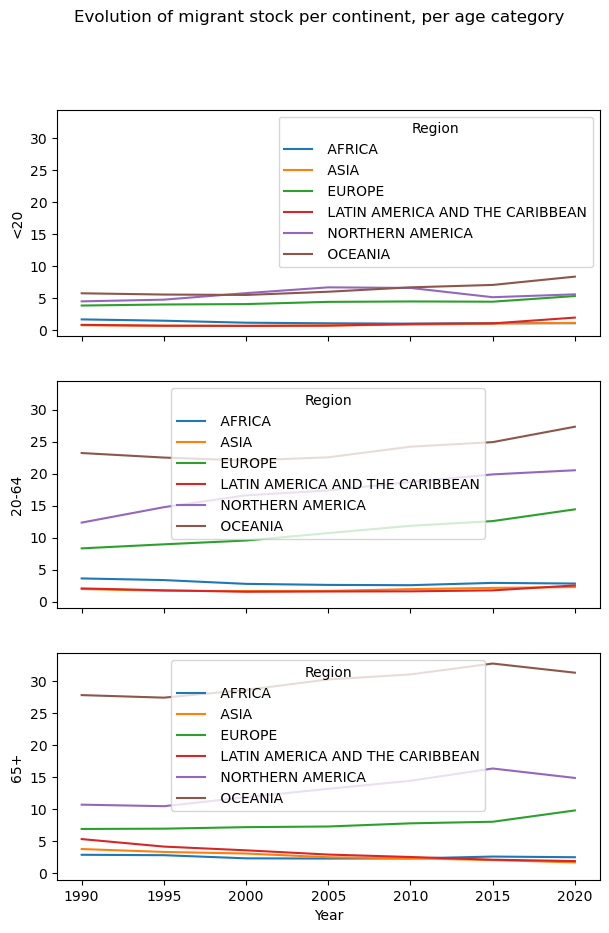

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True, sharey=True, figsize=(7,10))
fig.suptitle("Evolution of migrant stock per continent, per age category")

sns.lineplot(asd_ims_broad_age_percentage[filt_continent], x="Year", y="<20", hue="Region", ax=ax[0])
sns.lineplot(asd_ims_broad_age_percentage[filt_continent], x="Year", y="20-64", hue="Region", ax=ax[1])
sns.lineplot(asd_ims_broad_age_percentage[filt_continent], x="Year", y="65+", hue="Region", ax=ax[2])

## Sex destination and origin

In [ ]:
# Except for Table 1, always both sexes combined
sdo_sheets = {"Table 1": "IMS by sex and region",
              "Table 2": "IMS by destination and origin 2020",
              "Table 3": "IMS by destination and origin 2015",
              "Table 4": "IMS by destination and origin 2010",
              "Table 5": "IMS by destination and origin 2005",
              "Table 6": "IMS by destination and origin 2000",
              "Table 7": "IMS by destination and origin 1995", 
              "Table 8": "IMS by destination and origin 1990"}

In [ ]:
temp_df = utils.import_file(SEX_DESTINATION_ORIGIN, asd_sheets)

In [ ]:
sdo_ims_sex_region = temp_df["Table 1"]
sdo_2020 = temp_df["Table 2"]
sdo_2015 = temp_df["Table 3"]
sdo_2010 = temp_df["Table 4"]
sdo_2005 = temp_df["Table 5"]
sdo_2000 = temp_df["Table 6"]
sdo_1995= temp_df["Table 7"]
sdo_1990 = temp_df["Table 8"] 

## Worldmap

In [23]:
# Reading the world polygons
gdf = gpd.read_file('data_world/world_administrative_boundaries')
display(gdf)

,iso3,status,color_code,name,continent,region,iso_3166_1_,french_shor,geometry
0,None,Adm. by EGY,EGY,Ma'tan al-Sarra,Africa,Northern Africa,None,Ma'tan al-Sarra,"POLYGON ((33.25104 21.99977, 34.15064 21.99603..."
1,CHE,Member State,CHE,Switzerland,Europe,Western Europe,CH,Suisse,"POLYGON ((9.56672 47.54045, 9.55980 47.50209, ..."
2,None,UK Territory,GBR,Jersey,Europe,Northern Europe,None,Jersey,"POLYGON ((-2.01500 49.21417, -2.02111 49.17721..."
3,AUT,Member State,AUT,Austria,Europe,Western Europe,AT,Autriche,"POLYGON ((16.94618 48.61907, 16.94333 48.57333..."
4,PRT,Member State,PRT,Portugal,Europe,Southern Europe,PT,Portugal,"POLYGON ((-7.43185 37.25319, -7.41903 37.18055..."
...,...,...,...,...,...,...,...,...,...
251,SVK,Member State,SVK,Slovakia,Europe,Eastern Europe,SK,Slovaquie,"POLYGON ((22.55805 49.07944, 22.55166 49.03943..."
252,MLI,Member State,MLI,Mali,Africa,Western Africa,ML,Mali,"POLYGON ((-4.80611 25.00027, -4.52528 24.82500..."
253,ARM,Member State,ARM,Armenia,Asia,Western Asia,AM,Arménie,"POLYGON ((46.54038 38.87559, 46.51639 38.87804..."
254,ALB,Member State,ALB,Albania,Europe,Southern Europe,AL,Albanie,"POLYGON ((20.07142 42.56091, 20.10208 42.53347..."


<Axes: >

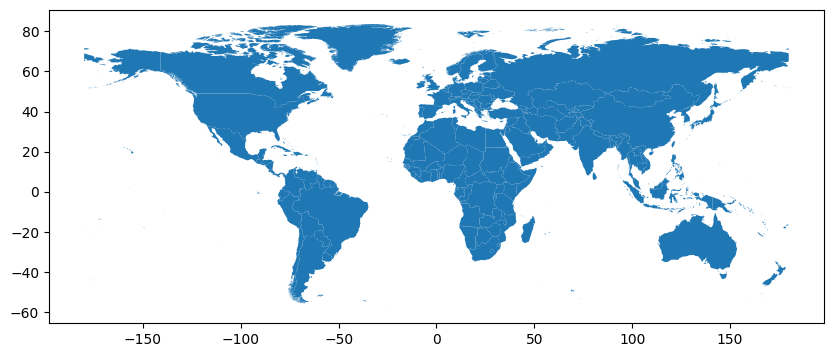

In [24]:
# Plot the polygon a first time
gdf.plot(figsize=(10,5))

In [25]:
# Replace different land names
list1 = [
    'Libyan Arab Jamahiriya',
    'Hong Kong',
    'U.K. of Great Britain and Northern Ireland',
    'West Bank',
    'Taiwan',
    'Venezuela',
    'Bosnia & Herzegovina',
    'Gaza Strip',
    'Swaziland',
    'Democratic People\'s Republic of Korea',
    'Vietnam',
    'The former Yugoslav Republic of Macedonia',
    'Czech Republic',
  #  'Arunachal Pradesh', * This is one of the holes  - but not in the excel categories!
    'Bolivia',
    'Moldova, Republic of'
]

list2 = [
    'Libya',
    'China, Hong Kong SAR',
    'United Kingdom',
    'State of Palestine',
    'China, Taiwan Province of China',
    'Venezuela (Bolivarian Republic of)',
    'Bosnia and Herzegovina',
    'State of Palestine',
    'Eswatini',
    'Dem. People\'s Republic of Korea',
    'Viet Nam',
    'North Macedonia',
    'Czechia',
    'Bolivia (Plurinational State of)',
    'Republic of Moldova'
]

gdf['name'] = gdf['name'].replace(list1, 
                                      list2)

In [26]:
# Merge the two datasets
asd_ims_percentage['Region'] = asd_ims_percentage['Region'].str.strip().str.rstrip('*')
gdf['name'] = gdf['name'].str.strip().str.rstrip('*')

joined_df = pd.merge(asd_ims_percentage, gdf, left_on='Region', right_on='name', how='left')
joined_df = joined_df[joined_df['geometry'].notna()]
display(joined_df)

,Year,Region,Notes,Location code,Type of data,0-4,5-9,10-14,15-19,20-24,...,Total.2,iso3,status,color_code,name,continent,region,iso_3166_1_,french_shor,geometry
161,1990,Burundi,NaN,108,B R,2.048177,2.754167,3.163745,3.949327,5.955212,...,6.122000,BDI,Member State,BDI,Burundi,Africa,Eastern Africa,BI,Burundi,"POLYGON ((30.57333 -2.39917, 30.52208 -2.46160..."
162,1995,Burundi,NaN,108,B R,1.471540,1.761952,1.927726,2.487222,4.650481,...,4.268205,BDI,Member State,BDI,Burundi,Africa,Eastern Africa,BI,Burundi,"POLYGON ((30.57333 -2.39917, 30.52208 -2.46160..."
163,2000,Burundi,NaN,108,B R,0.516431,0.873878,1.042678,1.402800,2.380494,...,1.987531,BDI,Member State,BDI,Burundi,Africa,Eastern Africa,BI,Burundi,"POLYGON ((30.57333 -2.39917, 30.52208 -2.46160..."
164,2005,Burundi,NaN,108,B R,1.784019,1.392609,1.780573,1.577804,1.910009,...,2.633106,BDI,Member State,BDI,Burundi,Africa,Eastern Africa,BI,Burundi,"POLYGON ((30.57333 -2.39917, 30.52208 -2.46160..."
165,2010,Burundi,NaN,108,B R,1.868872,1.345245,1.236385,1.771434,2.131028,...,2.861577,BDI,Member State,BDI,Burundi,Africa,Eastern Africa,BI,Burundi,"POLYGON ((30.57333 -2.39917, 30.52208 -2.46160..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1976,2000,Tuvalu,NaN,798,C,NaN,NaN,NaN,NaN,NaN,...,NaN,TUV,Member State,TUV,Tuvalu,Oceania,Polynesia,TV,Tuvalu,"MULTIPOLYGON (((179.22236 -8.55415, 179.21322 ..."
1977,2005,Tuvalu,NaN,798,C,NaN,NaN,NaN,NaN,NaN,...,NaN,TUV,Member State,TUV,Tuvalu,Oceania,Polynesia,TV,Tuvalu,"MULTIPOLYGON (((179.22236 -8.55415, 179.21322 ..."
1978,2010,Tuvalu,NaN,798,C,NaN,NaN,NaN,NaN,NaN,...,NaN,TUV,Member State,TUV,Tuvalu,Oceania,Polynesia,TV,Tuvalu,"MULTIPOLYGON (((179.22236 -8.55415, 179.21322 ..."
1979,2015,Tuvalu,NaN,798,C,NaN,NaN,NaN,NaN,NaN,...,NaN,TUV,Member State,TUV,Tuvalu,Oceania,Polynesia,TV,Tuvalu,"MULTIPOLYGON (((179.22236 -8.55415, 179.21322 ..."


In [27]:
# Explore the types
joined_df.dtypes

Year                int64
Region             object
Notes              object
Location code       int64
Type of data       object
                   ...   
continent          object
region             object
iso_3166_1_        object
french_shor        object
geometry         geometry
Length: 65, dtype: object

In [28]:
# Separate by year
data_1990 = joined_df[joined_df['Year'] == 1990]
data_2020 = joined_df[joined_df['Year'] == 2020]

# Transform them again to geodataframes
gdf_1990 = gpd.GeoDataFrame(data_1990, geometry='geometry')
gdf_2020 = gpd.GeoDataFrame(data_2020, geometry='geometry')

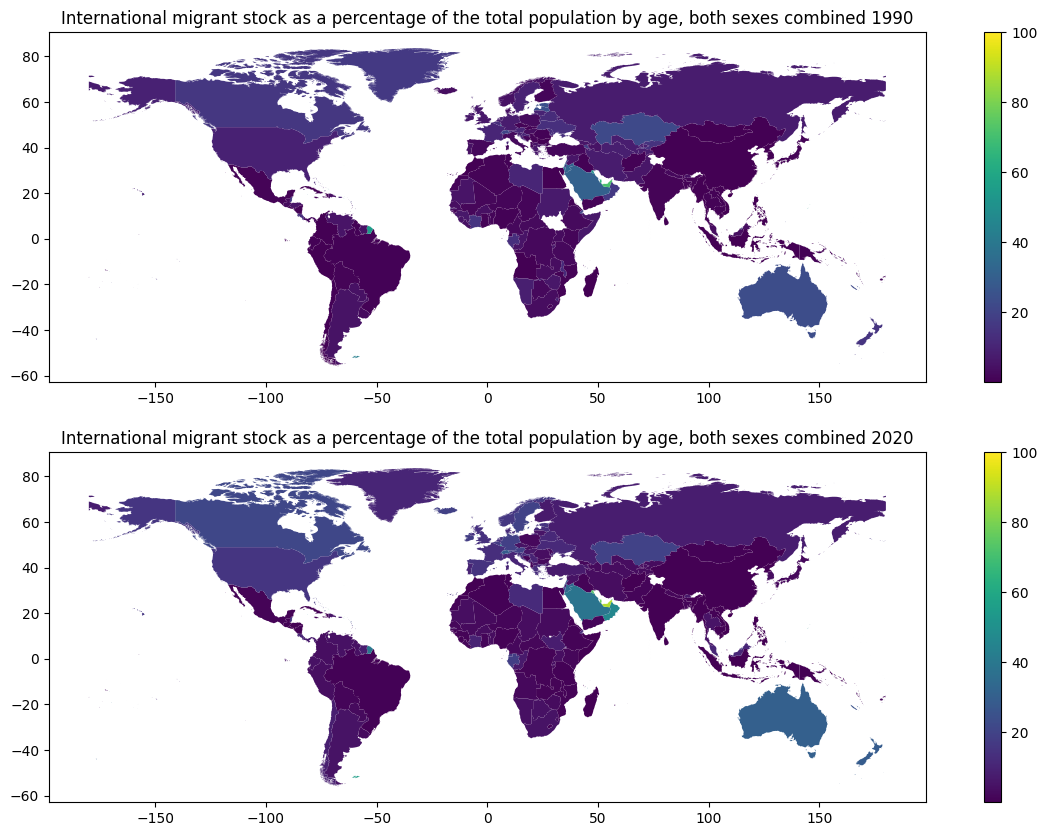

In [29]:
# Plot them
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Plot gdf_1990
gdf_1990.plot(ax=axes[0], column='Total', cmap='viridis', legend=True, markersize=50)
axes[0].set_title('International migrant stock as a percentage of the total population by age, both sexes combined 1990')

# Plot gdf_2020
gdf_2020.plot(ax=axes[1], column='Total', cmap='viridis', legend=True, markersize=50)
axes[1].set_title('International migrant stock as a percentage of the total population by age, both sexes combined 2020')

plt.show()